# Amortization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pv = 360000
rate = 0.05875
term = 30
pmt = np.pmt(rate / 12, term * 12, -pv)
pmt

2129.535947424394

In [3]:
amort_table = pd.DataFrame({'Balance': np.zeros(term * 12 + 1), 
                            'Interest': np.zeros(term * 12 + 1),
                            'Principal': np.zeros(term * 12 + 1),
                            'Cum_Int' : np.zeros(term * 12 + 1)})

In [4]:
amort_table['Balance'][0] = pv
amort_table['Interest'][0] = amort_table['Balance'][0] * rate / 12
amort_table['Principal'][0] = pmt - amort_table['Interest'][0]
amort_table['Cum_Int'] = amort_table['Interest'].cumsum()

In [6]:
amort_table.head()

,Balance,Interest,Principal,Cum_Int
0,360000.0,1762.5,367.035947,1762.5
1,0.0,0.0,0.000000,1762.5
2,0.0,0.0,0.000000,1762.5
3,0.0,0.0,0.000000,1762.5
4,0.0,0.0,0.000000,1762.5


In [7]:
# important not to round too early
for payment in range(1,360):
    amort_table['Balance'][payment] = amort_table['Balance'][payment - 1] - amort_table['Principal'][payment - 1]
    amort_table['Interest'][payment] = rate / 12 * amort_table['Balance'][payment]
    amort_table['Principal'][payment] = pmt  - amort_table['Interest'][payment]
amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
amort_table = round(amort_table,2)

In [8]:
amort_table.tail()

,Balance,Interest,Principal,Cum_Int
356,8414.90,41.20,2088.34,406570.89
357,6326.56,30.97,2098.56,406601.87
358,4228.00,20.70,2108.84,406622.57
359,2119.16,10.38,2119.16,406632.94
360,0.00,0.00,0.00,406632.94


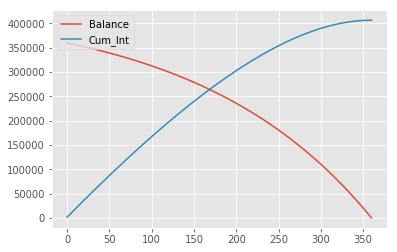

In [10]:
with plt.style.context('ggplot'):
    plt.plot(amort_table['Balance'])
    plt.plot(amort_table['Cum_Int'])
    plt.legend(loc=2)